In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List
import geopandas as gpd
a = sys.path.append('../modules/')
b = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial_all.csv', sep=',')

In [3]:
data_cubo

,Long(°),Lat(°),Anomalia Magnética(nT)
0,-42.05000,-23.0500,0.0
1,-42.05000,-23.0487,0.0
2,-42.05000,-23.0474,0.0
3,-42.05000,-23.0461,0.0
4,-42.05000,-23.0448,0.0
...,...,...,...
10196,-41.94001,-22.9252,0.0
10197,-41.94001,-22.9239,0.0
10198,-41.94001,-22.9226,0.0
10199,-41.94001,-22.9213,0.0


In [4]:
rj = gpd.read_file('RJ_shape.shp')

In [5]:
lat = np.array(data_cubo['Lat(°)'])
long = np.array(data_cubo['Long(°)'])
anomaly = np.array(data_cubo['Anomalia Magnética(nT)'])

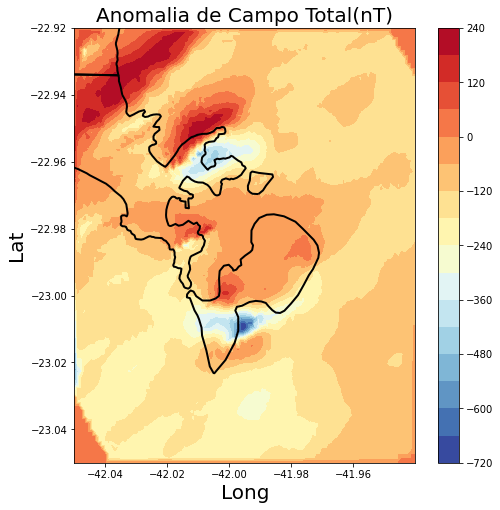

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long', fontsize=20)
plt.ylabel('Lat', fontsize=20)
plt.ylim(lat.min(),lat.max())
plt.xlim(long.min(),long.max())
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/mapa_total.png", dpi=300, bbox_inches='tight')
#plt.savefig("/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/mapa_total.pdf", dpi=300, bbox_inches='tight')
#cbar = plt.colorbar(orientation="horizontal")
#cbar.ax.tick_params(labelsize=15, labeltop=True, labelbottom=False, top=True, bottom=False)
#cbar.set_label("nT",fontsize=18, loc="center")
plt.colorbar();
plt.show()


In [7]:
x_space = [-22.948,-22.948,-22.962,-22.962,-22.948]
y_space = [-42.02,-42.0,-42.0,-42.02,-42.02]

import utm

utm_1= utm.from_latlon(-22.948, -42.0,23, 'K')
utm_2= utm.from_latlon(-22.962, -42.02, 23, 'K')
print(utm_1)
print(utm_2)

(807660.7341896289, 7459094.213347077, 23, 'K')
(805576.8664180683, 7457584.754688588, 23, 'K')


In [8]:
data_bolinhas = pd.read_table('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests/Dissertacao/Test_real/Morro_do_forno/final_ind_lat_long_1.csv', sep=',')

In [9]:
lat_= np.reshape(np.array(data_bolinhas["lat"]), (10))
long_= np.reshape(np.array(data_bolinhas["long"]), (10))

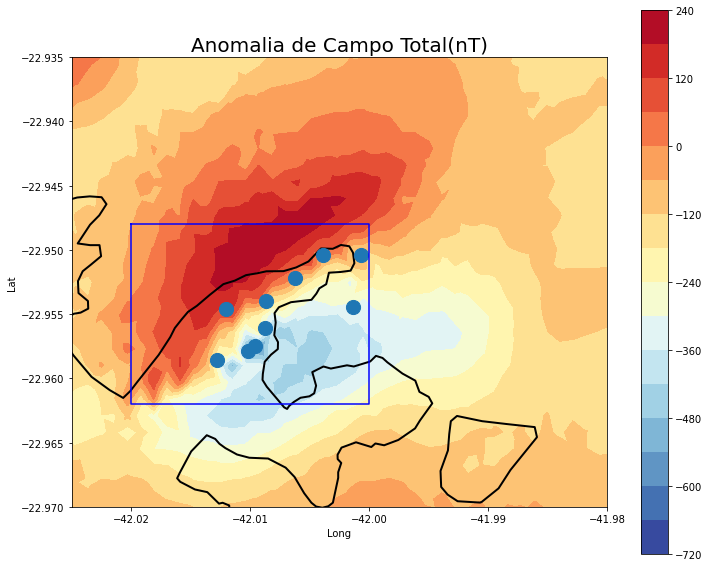

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
anomaly_ = plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long')
plt.ylabel('Lat')
space_plot = plt.scatter(long_,lat_, c=None, s=200.0)
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.colorbar(anomaly_);

In [11]:
d = [22, 150, 87, 300, 78, 96, 54, 200, 600, 402] #Converter as distEncias de m pra km
d = np.array(d)
dm = np.mean(d)
print(dm)
delta_d = (1/(len(d)-1))*np.sum((d - dm)**2)
#delta_d2 = (1/(len(d)-1))*(np.sum((d - dm)**2 /(np.max(d)- np.min(d))))

198.9


In [12]:
print(delta_d)
#print(delta_d2)

33862.322222222225


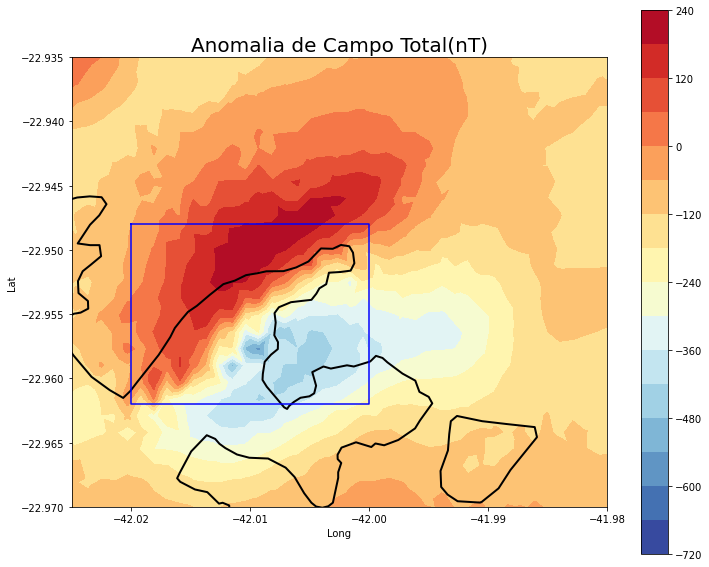

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.ylim(-22.97,-22.935)
plt.xlim(-42.025,-41.98)
plt.colorbar();

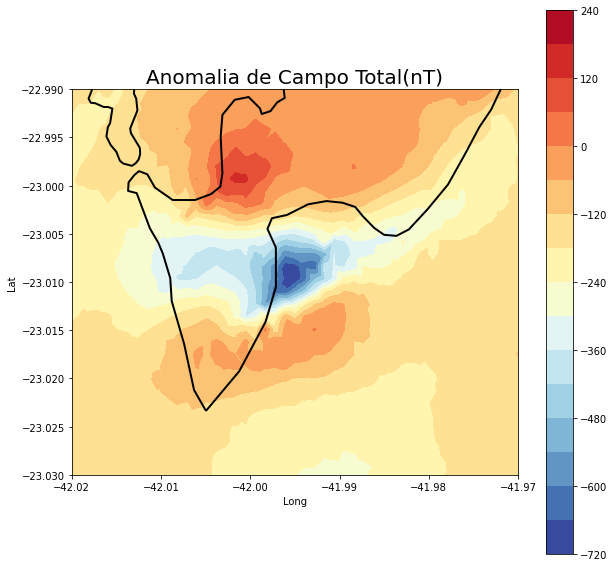

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.tricontourf(long.flatten(),lat.flatten(),anomaly.flatten(), 15, cmap=plt.cm.RdYlBu_r)
space_plot = plt.plot(y_space,x_space, 'b-', mew = 15.0, label = 'Search domain')
rj.plot(facecolor='none', edgecolor= 'k', lw =2, ax=ax)
plt.title('Anomalia de Campo Total(nT)', fontsize = 20)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.ylim(-23.03, -22.990)
plt.xlim(-42.02,-41.97)
plt.colorbar();